<a href="https://colab.research.google.com/github/SamuelBFG/DL-studies/blob/master/IA353/EF1p3_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base Model

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [4]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 13ms/step - loss: 2.2488 - accuracy: 0.1995
Epoch 2/5
1563/1563 [==============================] - 20s 13ms/step - loss: 2.0159 - accuracy: 0.2394
Epoch 3/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.9950 - accuracy: 0.2522
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.9688 - accuracy: 0.2659
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.9634 - accuracy: 0.2656


## Test Accuracy

In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.8315 - accuracy: 0.3582


[1.8314578533172607, 0.3582000136375427]

## Working with multiple executions to stabilize results

In [6]:
executions = 5
histories = []
evaluations = []

for i in range(executions):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                      ])
  
  print('## Training model number: ', i+1)

  model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
  
  histories.append(model.fit(x_train, y_train, epochs=5, verbose=0))

  print('#• Test set:')
  evaluations.append(model.evaluate(x_test, y_test))
  print('\n')

## Training model number:  1
#• Test set:
313/313 [==============================] - 2s 5ms/step - loss: 1.8275 - accuracy: 0.3370


## Training model number:  2
#• Test set:
313/313 [==============================] - 2s 5ms/step - loss: 1.8287 - accuracy: 0.3524


## Training model number:  3
#• Test set:
313/313 [==============================] - 2s 6ms/step - loss: 1.8896 - accuracy: 0.3421


## Training model number:  4
#• Test set:
313/313 [==============================] - 2s 6ms/step - loss: 1.8404 - accuracy: 0.3306


## Training model number:  5
#• Test set:
313/313 [==============================] - 2s 5ms/step - loss: 1.8375 - accuracy: 0.3423




In [7]:
histories[0].history.keys()

dict_keys(['loss', 'accuracy'])

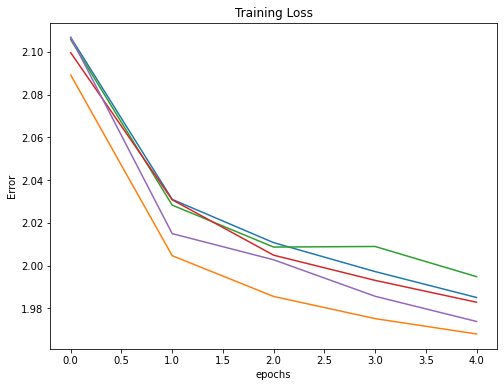

In [8]:
plt.figure(figsize=(8, 6))  
plt.xlabel('epochs')
plt.ylabel('Error')
plt.title('Training Loss')
for i in range(executions):
  plt.plot(histories[i].history['loss'])
plt.show()

In [9]:
histories[-1].history['accuracy'] # Last training acc log per epochs

[0.21310000121593475,
 0.23907999694347382,
 0.24741999804973602,
 0.25624001026153564,
 0.2604599893093109]

In [10]:
evaluations[0] # Loss and acc for the first model (LIST)

[1.8274809122085571, 0.3370000123977661]

In [11]:
acc_val = []
acc_test = []

for i in range(executions):
  acc_val.append(sum(histories[i].history['accuracy']) / len(histories[i].history['accuracy']))
  acc_test.append(evaluations[i][1])

acc_val

[0.23691999912261963,
 0.252536004781723,
 0.23567599654197693,
 0.23731600046157836,
 0.24325999915599822]

In [12]:
acc_test

[0.3370000123977661,
 0.352400004863739,
 0.34209999442100525,
 0.33059999346733093,
 0.3422999978065491]

### Average validation accuracy (training set)

In [13]:
avg_acc_val = sum(acc_val)/len(acc_val)
avg_acc_val

0.24114160001277923

### Average test accuracy

In [14]:
avg_acc_test = sum(acc_test)/len(acc_test)
avg_acc_test

0.3408800005912781

## Kfold Cross-Validation

In [15]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
num_folds = 10


train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
inputs = np.concatenate((train_data, train_data_val), axis=0)
targets = np.concatenate((train_labels, train_labels_val), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(inputs, targets):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                      ])
  
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  history = model.fit(inputs[train], targets[train],
              batch_size=64,
              epochs=5,
              verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score for fold 1: loss of 1.7926682233810425; accuracy of 36.21000051498413%
Score for fold 2: loss of 1.8105227947235107; accuracy of 33.21999907493591%
Score for fold 3: loss of 1.807654857635498; accuracy of 33.5099995136261%
Score for fold 4: loss of 1.7633332014083862; accuracy of 36.35999858379364%
Score for fold 5: loss of 1.8126325607299805; accuracy of 35.269999504089355%
Score for fold 6: loss of 1.7946263551712036; accuracy of 36.4300012588501%
Score for fold 7: loss of 1.8531603813171387; accuracy of 31.790000200271606%
Score for fold 8: loss of 1.7788171768188477; accuracy of 35.22000014781952%
Score for fold 9: loss of 1.8307414054870605; accuracy of 33.37999880313873%
Score for fold 10: loss of 1.8407584428787231; accuracy of 33.21000039577484%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.7926682233810425 - Accuracy: 36.21000051498413%
--

# Modified Model

In [17]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#### 1024 neurons

In [18]:
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)

model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(1024, activation=tf.nn.relu),
#  tf.keras.layers.Dropout(0.5),
  # tf.keras.layers.Dense(256, activation=tf.nn.relu),  
#  tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = Adam(lr=0.001),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_data = (train_data_val, train_labels_val), verbose = 2)

Epoch 1/5
625/625 - 19s - loss: 2.0076 - accuracy: 0.3148 - val_loss: 1.8109 - val_accuracy: 0.3452
Epoch 2/5
625/625 - 18s - loss: 1.7254 - accuracy: 0.3855 - val_loss: 1.6584 - val_accuracy: 0.4036
Epoch 3/5
625/625 - 21s - loss: 1.6426 - accuracy: 0.4156 - val_loss: 1.6242 - val_accuracy: 0.4240
Epoch 4/5
625/625 - 20s - loss: 1.5951 - accuracy: 0.4344 - val_loss: 1.5718 - val_accuracy: 0.4418
Epoch 5/5
625/625 - 19s - loss: 1.5521 - accuracy: 0.4515 - val_loss: 1.5564 - val_accuracy: 0.4486


In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.5612 - accuracy: 0.4498


[1.5612391233444214, 0.4498000144958496]

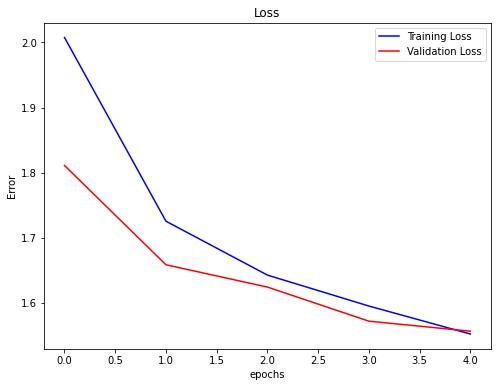

In [20]:
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()

#### 2 layers with 512 neurons

In [21]:
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)

model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
#  tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),  
#  tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = Adam(lr=0.001),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_data = (train_data_val, train_labels_val), verbose = 2)

Epoch 1/5
625/625 - 14s - loss: 1.8831 - accuracy: 0.3215 - val_loss: 1.7414 - val_accuracy: 0.3747
Epoch 2/5
625/625 - 12s - loss: 1.6913 - accuracy: 0.3942 - val_loss: 1.6615 - val_accuracy: 0.4072
Epoch 3/5
625/625 - 13s - loss: 1.6063 - accuracy: 0.4254 - val_loss: 1.5601 - val_accuracy: 0.4433
Epoch 4/5
625/625 - 13s - loss: 1.5521 - accuracy: 0.4435 - val_loss: 1.5660 - val_accuracy: 0.4396
Epoch 5/5
625/625 - 13s - loss: 1.5055 - accuracy: 0.4626 - val_loss: 1.5376 - val_accuracy: 0.4513


In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.5228 - accuracy: 0.4623


[1.5227692127227783, 0.46230000257492065]

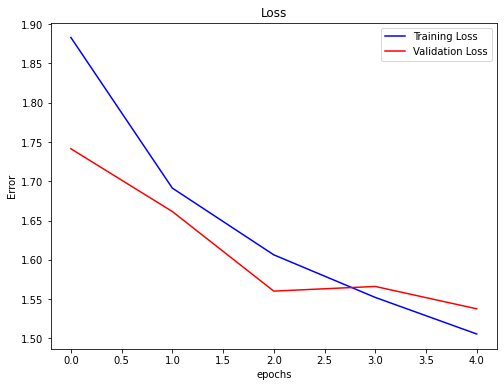

In [23]:
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()

#### 2 layers with 512 and 256 neurons 

In [24]:
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)

model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
#  tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(256, activation=tf.nn.relu),  
#  tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = Adam(lr=0.001),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_data = (train_data_val, train_labels_val), verbose = 2)

Epoch 1/5
625/625 - 12s - loss: 1.8882 - accuracy: 0.3249 - val_loss: 1.7443 - val_accuracy: 0.3763
Epoch 2/5
625/625 - 12s - loss: 1.6936 - accuracy: 0.3959 - val_loss: 1.6488 - val_accuracy: 0.4063
Epoch 3/5
625/625 - 11s - loss: 1.6113 - accuracy: 0.4260 - val_loss: 1.6015 - val_accuracy: 0.4291
Epoch 4/5
625/625 - 11s - loss: 1.5598 - accuracy: 0.4451 - val_loss: 1.5577 - val_accuracy: 0.4448
Epoch 5/5
625/625 - 12s - loss: 1.5167 - accuracy: 0.4581 - val_loss: 1.5015 - val_accuracy: 0.4655


In [25]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4934 - accuracy: 0.4682


[1.4934422969818115, 0.4681999981403351]

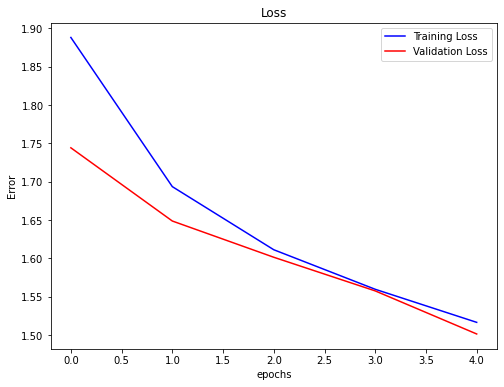

In [26]:
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()

## Kfold Cross-Validation on best model

In [27]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
num_folds = 10


train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
inputs = np.concatenate((train_data, train_data_val), axis=0)
targets = np.concatenate((train_labels, train_labels_val), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(inputs, targets):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dense(256, activation=tf.nn.relu),  
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                      ])
  
  model.compile(optimizer = Adam(lr=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  history = model.fit(inputs[train], targets[train],
              batch_size=64,
              epochs=5,
              verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score for fold 1: loss of 1.5089539289474487; accuracy of 46.20000123977661%
Score for fold 2: loss of 1.525278091430664; accuracy of 45.69999873638153%
Score for fold 3: loss of 1.5753039121627808; accuracy of 43.779999017715454%
Score for fold 4: loss of 1.5599735975265503; accuracy of 44.22999918460846%
Score for fold 5: loss of 1.5054482221603394; accuracy of 46.32999897003174%
Score for fold 6: loss of 1.5106581449508667; accuracy of 46.70000076293945%
Score for fold 7: loss of 1.5215277671813965; accuracy of 45.86000144481659%
Score for fold 8: loss of 1.5132616758346558; accuracy of 46.65000140666962%
Score for fold 9: loss of 1.5127677917480469; accuracy of 46.05000019073486%
Score for fold 10: loss of 1.5145714282989502; accuracy of 45.69999873638153%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.5089539289474487 - Accuracy: 46.20000123977661%
-